[View in Colaboratory](https://colab.research.google.com/github/marcelcerri/Integra-o-ordens-de-rea-o/blob/master/Integrando_equa%C3%A7%C3%B5es_diferenciais_e_ajustando_pontos_experimentais_importando_os_dados.ipynb)

**Integrando equações diferenciais e ajuste de pontos experimentais completo**

In [0]:
#Importação todos os pacotes utilizados
import pandas as pd
from google.colab import files
import io
from scipy import stats
from scipy.interpolate import *
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#carregar o arquivo em csv
uploaded = files.upload()

Saving Cultivo_e_coli_1000_rpm_sem_lag.csv to Cultivo_e_coli_1000_rpm_sem_lag.csv


In [3]:
#verificação do upload
for fn in uploaded.keys():
  print('O arquivo "{name}" com tamanho de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
#transformando o arquivo csv em data frame
calibracao_df = pd.read_csv(io.StringIO(uploaded['Cultivo_e_coli_1000_rpm_sem_lag.csv'].decode('utf-8')))
#impressão do arquivo em data frame
calibracao_df

O arquivo "Cultivo_e_coli_1000_rpm_sem_lag.csv" com tamanho de 78 bytes


,Tempo,DO
0,4,0.14
1,6,0.26
2,8,0.40
3,10,0.84
4,12,1.33
5,14,1.89
6,22,5.27
7,24,6.75


In [4]:
#transformando data frame em vetor
calibracao_np = calibracao_df.values
#impressão do vetor
calibracao_np

array([[ 4.  ,  0.14],
       [ 6.  ,  0.26],
       [ 8.  ,  0.4 ],
       [10.  ,  0.84],
       [12.  ,  1.33],
       [14.  ,  1.89],
       [22.  ,  5.27],
       [24.  ,  6.75]])

In [5]:
#vetor do eixo x
t = calibracao_np[:,0]
print(t)

[ 4.  6.  8. 10. 12. 14. 22. 24.]


In [6]:
#vetor do eixo y
data_ca = calibracao_np[:,1]
print(data_ca)

[0.14 0.26 0.4  0.84 1.33 1.89 5.27 6.75]


In [0]:
def growth(Ca,t, mi):
  return mi*Ca

In [0]:
def y(t, mi, Ca0):
  y = odeint(growth, Ca0, t, args=(mi,))
  return y.ravel()

In [9]:
popt, cov = curve_fit(y, t, data_ca, [0.1, 0.1])
a_opt, y0_opt = popt
print(y)

<function y at 0x7f0636324de8>


In [10]:
print("mi = %g" % a_opt)
print("Ca0 = %g" % y0_opt)

mi = 0.14517
Ca0 = 0.376749


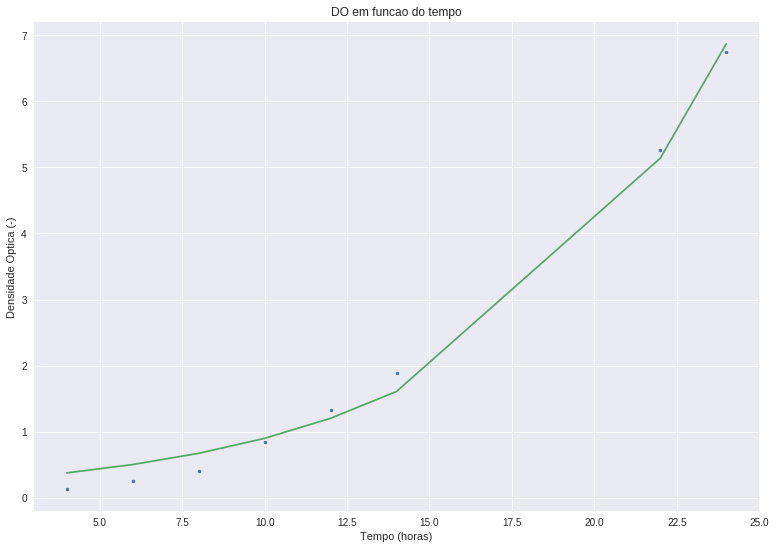

In [24]:
import matplotlib.pyplot as plt
plt.plot(t, data_ca, '.',
         t, y(t, a_opt, y0_opt), '-')
plt.gcf().set_size_inches(13, 9)
plt.savefig('out.png', dpi=100)
plt.xlabel('Tempo (horas)')
plt.ylabel('Densidade Optica (-)')

plt.title('DO em funcao do tempo')
plt.legend()
plt.show()
files.download( "out.png" )

In [0]:
#y = odeint(growth, y0_opt, t, args=(a_opt,))
#guardando as informações e salvando em txt
data = np.vstack((t, y.T))
data = data.T
print(data)

[[ 0.          0.2030153 ]
 [ 2.          0.27229713]
 [ 4.          0.36522238]
 [ 6.          0.48985969]
 [ 8.          0.65703125]
 [10.          0.88125246]
 [12.          1.18199232]
 [14.          1.5853639 ]
 [22.          5.13081321]
 [24.          6.88177573]]


In [0]:
#salvando em csv
df = pd.DataFrame(data)
df.to_csv("data.csv")
files.download('data.csv')
print(df)

      0         1
0   0.0  0.203015
1   2.0  0.272297
2   4.0  0.365222
3   6.0  0.489860
4   8.0  0.657031
5  10.0  0.881252
6  12.0  1.181992
7  14.0  1.585364
8  22.0  5.130813
9  24.0  6.881776
